# ML Algorithm Insight Series
## Module: Recurrent Neural Networks (LSTM & GRU)

### 1. Introduction & Intuition

Recurrent Neural Networks (RNNs) are designed for sequential data—data where context and order matter. Examples include time-series forecasting, speech recognition, and natural language processing.

Think of RNNs as memory-enabled networks that not only process the current input but also retain information from prior inputs in the sequence.


### 2. How the Algorithm Works

Standard RNNs suffer from vanishing gradients over long sequences. LSTMs (Long Short-Term Memory) and GRUs (Gated Recurrent Units) address this using gated mechanisms.

LSTM Core:
- **Forget Gate** \( f_t \): what to forget  
- **Input Gate** \( i_t \): what new information to add  
- **Output Gate** \( o_t \): what to output

Core LSTM equations:
\[
f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f) \\
i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i) \\
\tilde{c}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c) \\
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t \\
o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o) \\
h_t = o_t \odot \tanh(c_t)
\]

GRU is a simplified variant with fewer gates and parameters.


### 3. Data and Preparation Insights

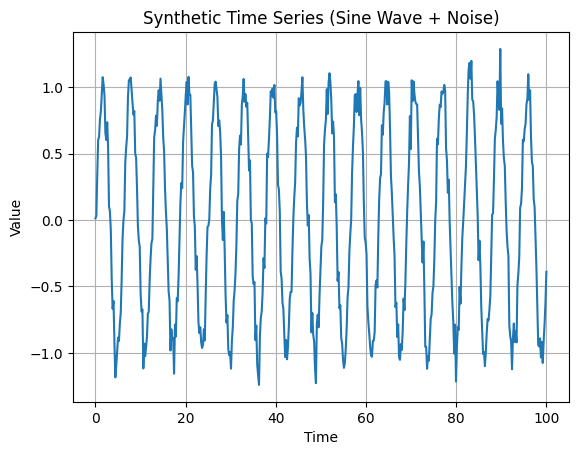

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy sine wave as synthetic time series
x = np.linspace(0, 100, 500)
y = np.sin(x) + 0.1 * np.random.randn(500)

plt.plot(x, y)
plt.title("Synthetic Time Series (Sine Wave + Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Normalize sequences and reshape inputs to match expected format: (samples, timesteps, features).

### 4. Implementation Highlights

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare sequence dataset
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()
window_size = 10
X_seq, y_seq = create_sequences(y_scaled, window_size)

X_seq = X_seq.reshape(-1, window_size, 1)
y_seq = y_seq.reshape(-1, 1)

# Train-test split
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# LSTM model
model = Sequential([
    LSTM(20, activation='tanh', return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, verbose=0)

2025-05-23 23:35:43.946637: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jasonrobinson/my-data-science-journey-3/ds_journey_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 5. Insightful Visualization

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


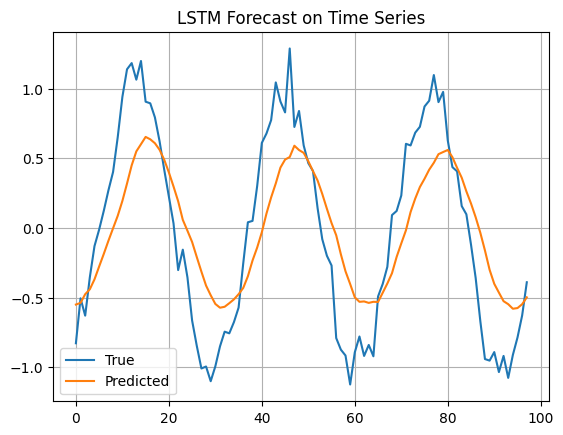

In [3]:
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.plot(y_test_inv, label='True')
plt.plot(y_pred_inv, label='Predicted')
plt.title("LSTM Forecast on Time Series")
plt.legend()
plt.grid(True)
plt.show()

Overlaying predictions and true values helps evaluate sequential tracking and drift.

### 6. Algorithm Evaluation

In [4]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Test MSE: {mse:.4f}")

Test MSE: 0.1828


### 7. Pros, Cons, and Techniques

**Strengths:**
- Captures sequential dependencies
- Handles variable-length input
- Works well with noisy signals

**Limitations:**
- Harder to train and tune
- Requires more data
- Interpretability is limited

**Enhancements**:
- Use GRUs for lighter models
- Add dropout to mitigate overfitting
- Use bidirectional RNNs for contextual understanding


### 8. Further Explorations

- TODO: Compare LSTM and GRU performance
- TODO: Try bidirectional or stacked RNNs
- TODO: Test on real-world time series datasets


### 9. Summary & Resources

**Key Insights:**
- RNNs handle time-based and sequential data through memory units.
- LSTMs and GRUs solve the vanishing gradient problem.
- Sequential learning allows modeling of dependencies over time.

**Further Reading:**
- “Sequence Modeling” – Chollet, Deep Learning with Python
- Keras Documentation: LSTM, GRU layers
- Hochreiter & Schmidhuber (1997) - Long Short-Term Memory

**Notebook Repo**: (add your GitHub link)  
**Companion Article**: (add Medium/Substack link)
